In [4]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
fileused='/content/drive/MyDrive/ML/IMDB Dataset.csv'

Mounted at /content/drive


In [7]:
from sklearn.svm import LinearSVC
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,log_loss,brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
import numpy as np
df=pd.read_csv(fileused)
def preprocess(doc):
  words=re.findall(r"\b[a-z]+\b",str(doc).lower())
  return " ".join(words)
df["cleaned"]=df["review"].apply(preprocess)
vectorizer=CountVectorizer(binary=True)
X=vectorizer.fit_transform(df["cleaned"])
label_mapping={"negative":0, "positive":1}
df["label"]=df["sentiment"].map(label_mapping)
y=df["label"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearSVC(max_iter=5000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy is ",accuracy_score(y_test,y_pred))
print("Classification report is: \n\n",classification_report(y_test,y_pred))
print("Confusion matrix is\n")
print(confusion_matrix(y_test,y_pred))

Accuracy is  0.8653
Classification report is: 

               precision    recall  f1-score   support

           0       0.87      0.86      0.86      4961
           1       0.86      0.87      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Confusion matrix is

[[4271  690]
 [ 657 4382]]


Train Log Loss:0.1556
Test Log Loss:0.3047
Train Brier Score:0.0314
Test Brier Score:0.0927


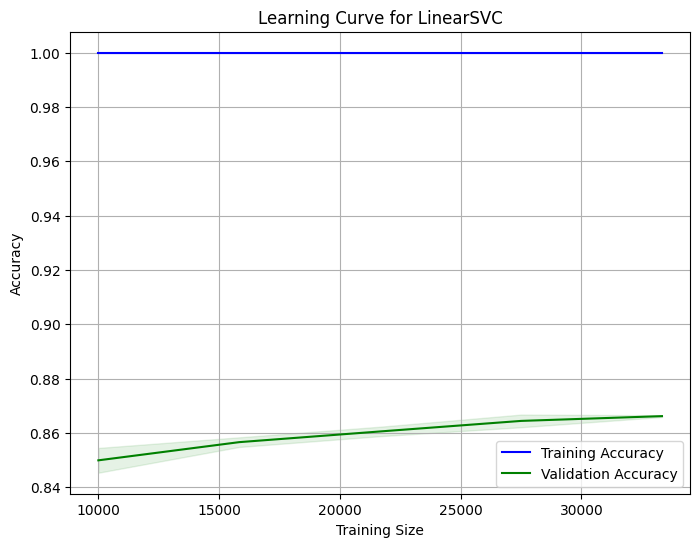

In [9]:

calibrated_model=CalibratedClassifierCV(model,cv=5)
calibrated_model.fit(X_train,y_train)
y_prob_train=calibrated_model.predict_proba(X_train)
y_prob_test=calibrated_model.predict_proba(X_test)
train_logloss=log_loss(y_train,y_prob_train)
test_logloss=log_loss(y_test,y_prob_test)
train_brier=np.mean([brier_score_loss((y_train==i).astype(int),y_prob_train[:,i]) for i in range(y_prob_train.shape[1])])
test_brier=np.mean([brier_score_loss((y_test==i).astype(int),y_prob_test[:,i]) for i in range(y_prob_test.shape[1])])
print(f"Train Log Loss:{train_logloss:.4f}")
print(f"Test Log Loss:{test_logloss:.4f}")
print(f"Train Brier Score:{train_brier:.4f}")
print(f"Test Brier Score:{test_brier:.4f}")
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
model_fast = LinearSVC(max_iter=5000)
train_sizes,train_scores,test_scores = learning_curve(model_fast,X,y,cv=3,scoring="accuracy",n_jobs=-1,train_sizes=np.linspace(0.3,1.0,5))
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)
plt.figure(figsize=(8,6))
plt.plot(train_sizes,train_mean,label="Training Accuracy",color="blue")
plt.plot(train_sizes,test_mean,label="Validation Accuracy",color="green")
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,alpha=0.1,color="blue")
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,alpha=0.1,color="green")
plt.title("Learning Curve for LinearSVC")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

